Necessary Import:

    pandas: Data manipulation and analysis 
    matplotlib and seaborn: Data visualization 
    datetime: Date/time handling 
    json: JSON file processing 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

Spotify History Data Preprocessing:

    This function processes raw Spotify data by:

        Converting JSON streaming history to DataFrame
        Transforming timestamps to datetime format
        Creating monthly periods for grouping
        Converting milliseconds to minutes for play duration
        Filtering data for Nov 2023 to Nov 2024



In [ ]:
def load_streaming_history(file_path):

    df = pd.read_json(file_path)
    df['endTime'] = pd.to_datetime(df['endTime'])
    df['month'] = df['endTime'].dt.to_period('M')
    df['minutes_played'] = df['msPlayed'] / (1000 * 60)
    
    # Filter for the specified date range
    df = df[(df['endTime'] >= '2023-11-01') & (df['endTime'] <= '2024-11-30')]
    return df

Monthly Artist Analysis Calculation:

    This function analyzes listening patterns by:

        Grouping data by month and artist
        Calculating total listening time per artist
        Identifying the most-listened artist each month
        Sorting results chronologically

In [ ]:
def get_monthly_top_artists(df):

    monthly_artists = df.groupby(['month', 'artistName'])['minutes_played'].sum().reset_index()
    monthly_top_artists = monthly_artists.loc[monthly_artists.groupby('month')['minutes_played'].idxmax()]

    monthly_top_artists = monthly_top_artists.sort_values('month')

    return monthly_top_artists


Bar Chart Visualization Creation:

    This function creates visualization by:

        Generating a colorful bar chart
        Setting appropriate figure size and colors
        Adding title and axis labels
        Including play duration values above each bar
        Formatting artist names and months on x-axis

In [ ]:

def visualize_monthly_artists(df_top_artists):
 
    plt.figure(figsize=(15, 10))

    
    ax = plt.gca()

    colors = sns.color_palette("husl", len(df_top_artists))
    bars = plt.bar(range(len(df_top_artists)), df_top_artists['minutes_played'], color=colors)

    plt.title('Most Listened Artists by Month (2023-11 to 2024-11)', fontsize=14, pad=20)
    plt.ylabel('Minutes Played')

    plt.xticks(range(len(df_top_artists)),
              [f"{str(month)}\n{artist}" for month, artist in zip(df_top_artists['month'], df_top_artists['artistName'])],
              rotation=45,
              ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')

    plt.subplots_adjust(bottom=0.2)

    plt.show()

Main Execution and Error Handling:

    Main execution block that:

        Loads the Spotify JSON data file
        Processes the streaming history
        Generates the visualization
        Handles potential errors during execution

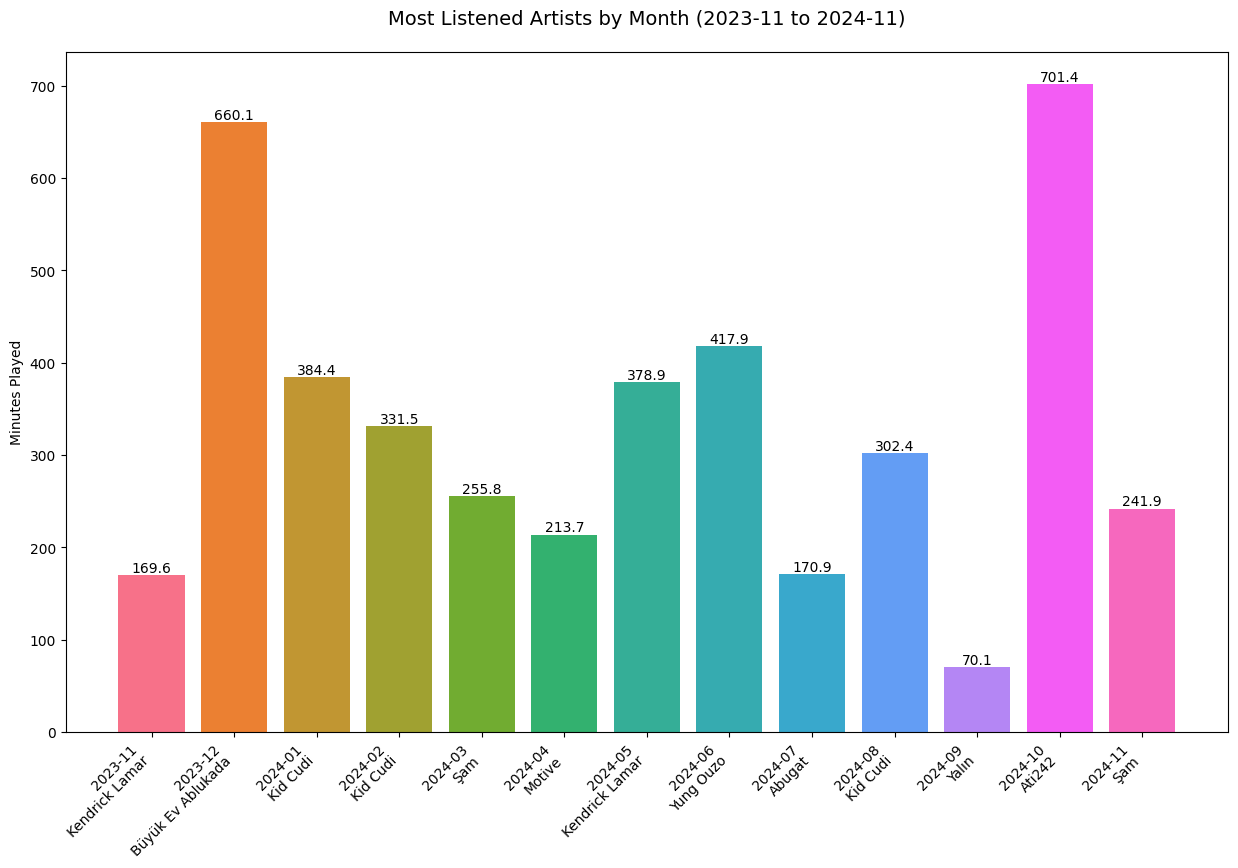

In [4]:

def main():
    try:
        file_path = "StreamingHistory_music_0.json"  
        df_history = load_streaming_history(file_path)
        monthly_top_artists = get_monthly_top_artists(df_history)
        visualize_monthly_artists(monthly_top_artists)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()